# Ames House Price Data - Comparing the models

> Juptyer notebook, running a Julia 0.5.2 kernel, with the help of Machine Learning modules written by the author

*We compare four models for predicting Sale Price that have been trained and tested in other notebooks. We take care to determine the statistical significance of any apparent performance benefits.*

Final rankings:

1. elastic net  (RMSL error = 0.106 ± 0.022)
2. XGBoost
3. extreme random forest
4. random forest with bagging 
5. single regularized decision tree

However, the differences in performance between models 1 and 2, and models 3 and 4, were not found to be statistically signicant (testing at level of 5%).

## Loading the cross-validation errors

In [1]:
using JLD
@load "cv_errors.jld"

5-element Array{Symbol,1}:
 :errors_elastic
 :errors_reg    
 :errors_rf     
 :errors_xgboost
 :errors_xtreme 

## Comparison graphic
We begin by collecting in one plot approximate pdf's for the RMSL error estimates associated with each model: 


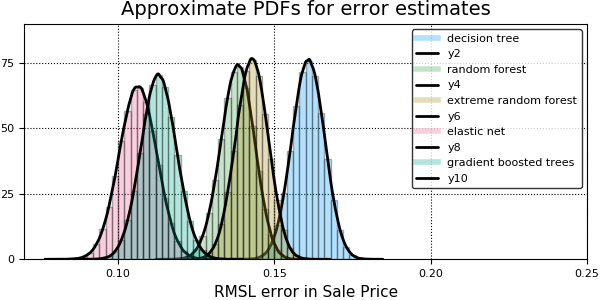

In [2]:
using Plots, ADBPlots
pyplot(size=(600,300))

bootstrap_histogram(errors_reg, label="decision tree")
bootstrap_histogram!(errors_rf, label="random forest")
bootstrap_histogram!(errors_xtreme, label="extreme random forest")
bootstrap_histogram!(errors_elastic, label="elastic net")
bootstrap_histogram!(errors_xgboost, label="gradient boosted trees")
plot!(xlim=(0.07,0.25), ylim=(0.0,90.0), xlab="RMSL error in Sale Price", 
    title="Approximate PDFs for error estimates")

## Testing significance

The graph suggests that we can order the models from best best to worst as follows:

1. elastic net 
2. gradient boosted trees (XGBoost)
3. random forest with bagging
4. extreme random forest
5. single regularized decision tree

However, the differences in performance between 1 and 2, and between 3 and 4, may not be statistically significant. We can check this by having models "compete" with each other, testing the null hypothesis that two given models have identical expected errors. We will perform these tests at the 5% significance level, using the function `compete` from the `Validation` module. A return value of "0" means the first model wins, "1" the second model wins, and "D" a draw. 

In [5]:
using Validation
import DataFrames:DataFrame
compete(errors_elastic, errors_xgboost, alpha=0.05)

'0'

In [4]:
compete(errors_rf, errors_xtreme, alpha=0.05)

'0'

So the differences in performaces between models 1 and 2, and between 3 and 4 are not statistically significant. 